In [9]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'eyetracking_data/User 5_all_gaze.csv'
df = pd.read_csv(file_path)

df['TIME'] = df['TIME(2024/10/01 15:23:54.710)'] # tiempo que pasa desde (2024/10/01 15:23:54.710)

# Filter pupilometry data
pupilometry_cols = ['TIME', 'LPMM', 'LPMMV', 'LPV', 'RPV', 'RPMM', 'RPMMV']
pupil_df = df[pupilometry_cols]



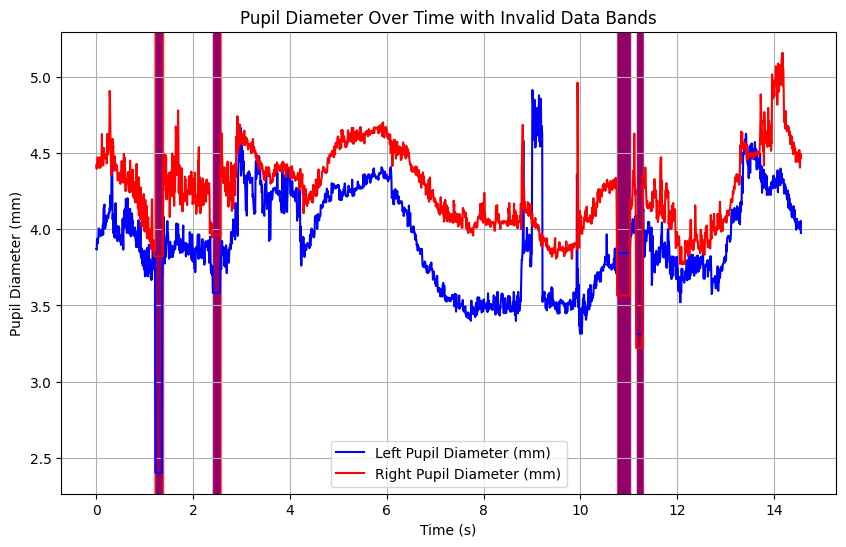

In [11]:

plt.figure(figsize=(10,6))

plt.plot(pupil_df['TIME'], pupil_df['LPMM'], label='Left Pupil Diameter (mm)', color='blue')
plt.plot(pupil_df['TIME'], pupil_df['RPMM'], label='Right Pupil Diameter (mm)', color='red')

# Añadimos las bandas semitransparentes para los periodos en que los flags son 0
for i in range(len(pupil_df) - 1):
    if pupil_df['LPV'].iloc[i] == 0:
        plt.axvspan(pupil_df['TIME'].iloc[i], pupil_df['TIME'].iloc[i + 1], color='blue', alpha=0.3)
    if pupil_df['RPV'].iloc[i] == 0:
        plt.axvspan(pupil_df['TIME'].iloc[i], pupil_df['TIME'].iloc[i + 1], color='red', alpha=0.3)

# Configuramos etiquetas y título
plt.xlabel('Time (s)')
plt.ylabel('Pupil Diameter (mm)')
plt.title('Pupil Diameter Over Time with Invalid Data Bands')

# Mostramos la leyenda y el grid
plt.legend()
plt.grid(True)

# Mostramos el gráfico
plt.show()



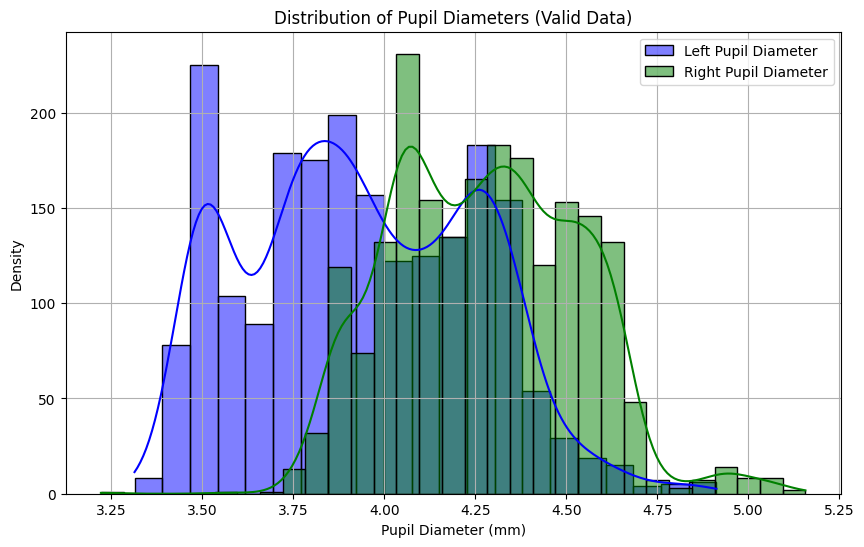

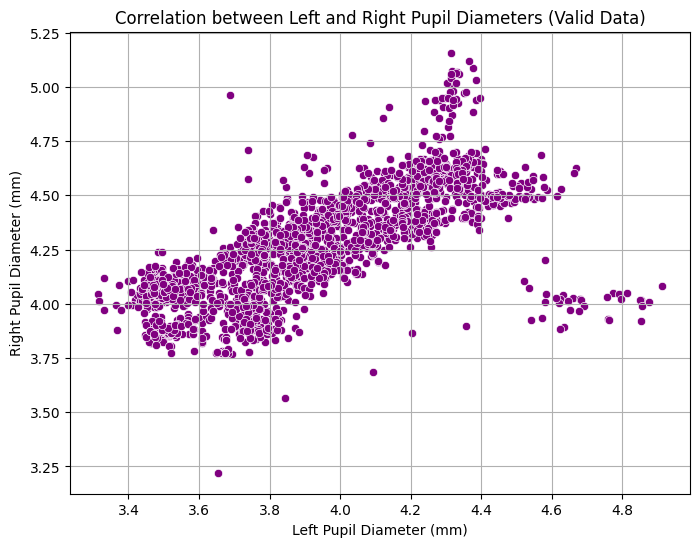

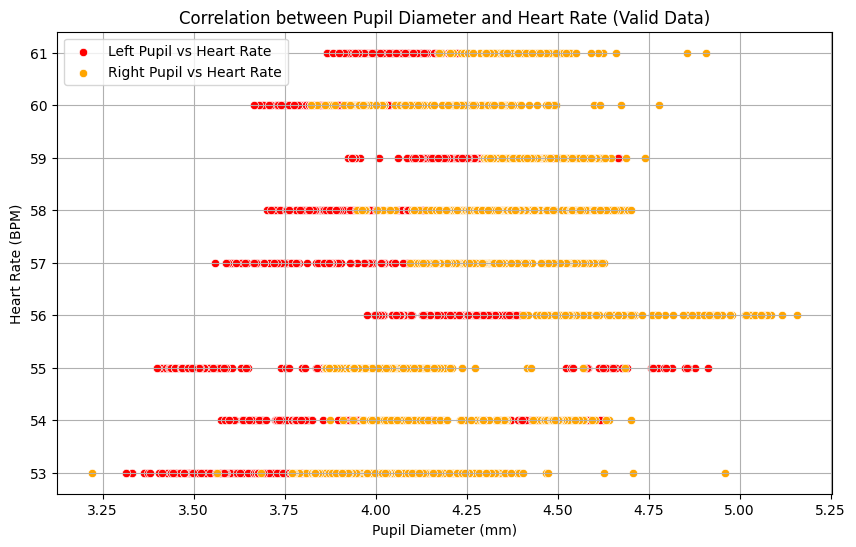

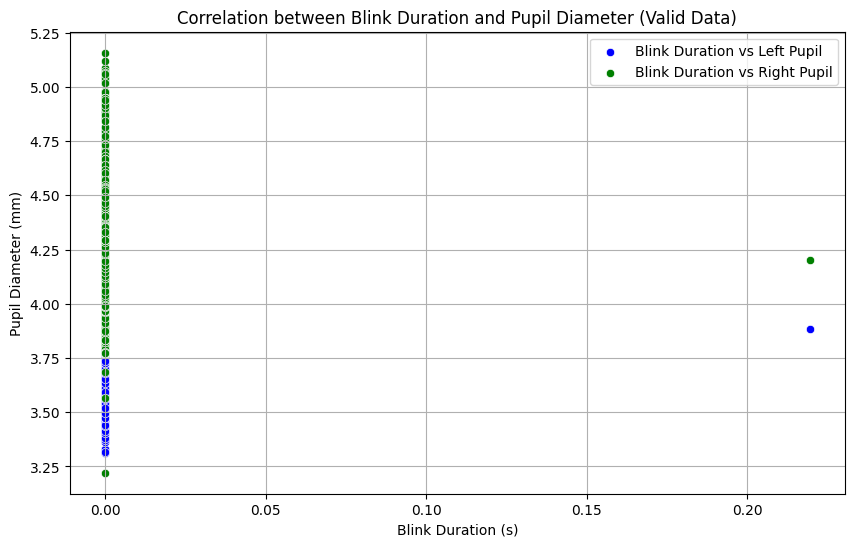

In [12]:
# Filtramos los datos válidos
valid_pupil_df = pupil_df[(pupil_df['LPV'] == 1) & (pupil_df['RPV'] == 1)]

# 1. Distribución del diámetro de las pupilas (solo datos válidos)
plt.figure(figsize=(10,6))
sns.histplot(valid_pupil_df['LPMM'], kde=True, color='blue', label='Left Pupil Diameter')
sns.histplot(valid_pupil_df['RPMM'], kde=True, color='green', label='Right Pupil Diameter')
plt.xlabel('Pupil Diameter (mm)')
plt.ylabel('Density')
plt.title('Distribution of Pupil Diameters (Valid Data)')
plt.legend()
plt.grid(True)
plt.show()

# 2. Correlación entre el diámetro de la pupila izquierda y derecha (solo datos válidos)
plt.figure(figsize=(8,6))
sns.scatterplot(x=valid_pupil_df['LPMM'], y=valid_pupil_df['RPMM'], color='purple')
plt.xlabel('Left Pupil Diameter (mm)')
plt.ylabel('Right Pupil Diameter (mm)')
plt.title('Correlation between Left and Right Pupil Diameters (Valid Data)')
plt.grid(True)
plt.show()

# 3. Relación entre el diámetro de la pupila y la frecuencia cardíaca (solo datos válidos)
plt.figure(figsize=(10,6))
sns.scatterplot(x=valid_pupil_df['LPMM'], y=df['HR'], color='red', label='Left Pupil vs Heart Rate')
sns.scatterplot(x=valid_pupil_df['RPMM'], y=df['HR'], color='orange', label='Right Pupil vs Heart Rate')
plt.xlabel('Pupil Diameter (mm)')
plt.ylabel('Heart Rate (BPM)')
plt.title('Correlation between Pupil Diameter and Heart Rate (Valid Data)')
plt.legend()
plt.grid(True)
plt.show()

